# **Creating Cohorts of Songs**
**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

**Problem Objective:**

As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.


#**Data Cleaning**

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('rolling_stones_spotify.csv')
# data = pd.DataFrame(path)
data.head(3)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400,0.956,-4.936,0.1150,130.066,0.3130,34,263160


In [2]:
data.drop('Unnamed: 0', axis= 1, inplace=True )
data.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
data.shape

(1610, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [5]:
data.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    1610
dtype: int64

*instrumentalness* : It predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [7]:
data.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


#**Data Analysis**

<ipython-input-8-ed0d7e222620>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


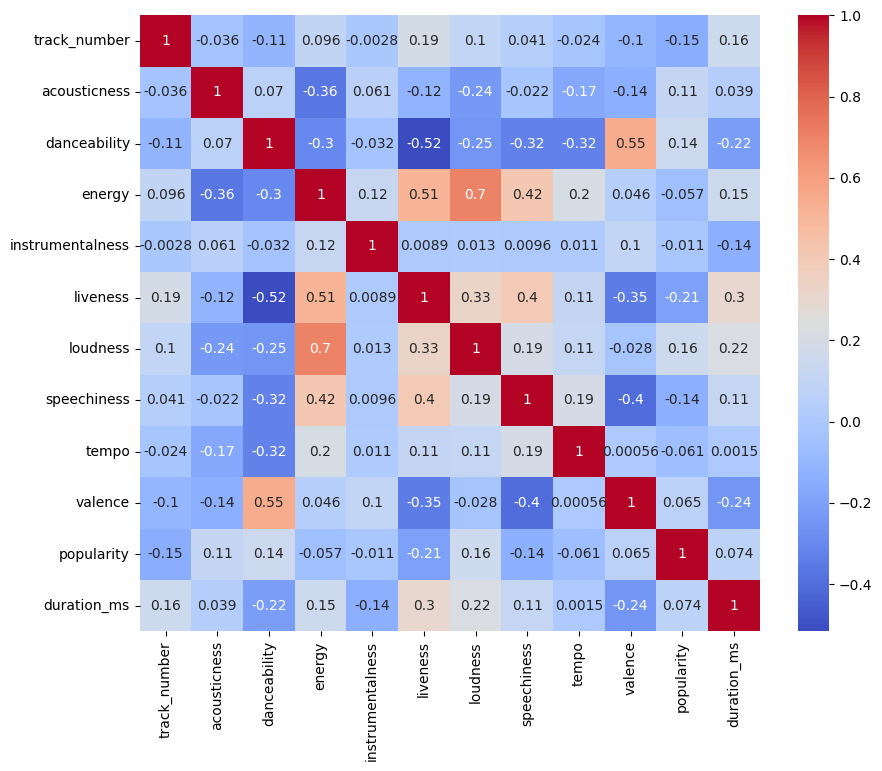

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [9]:
data.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

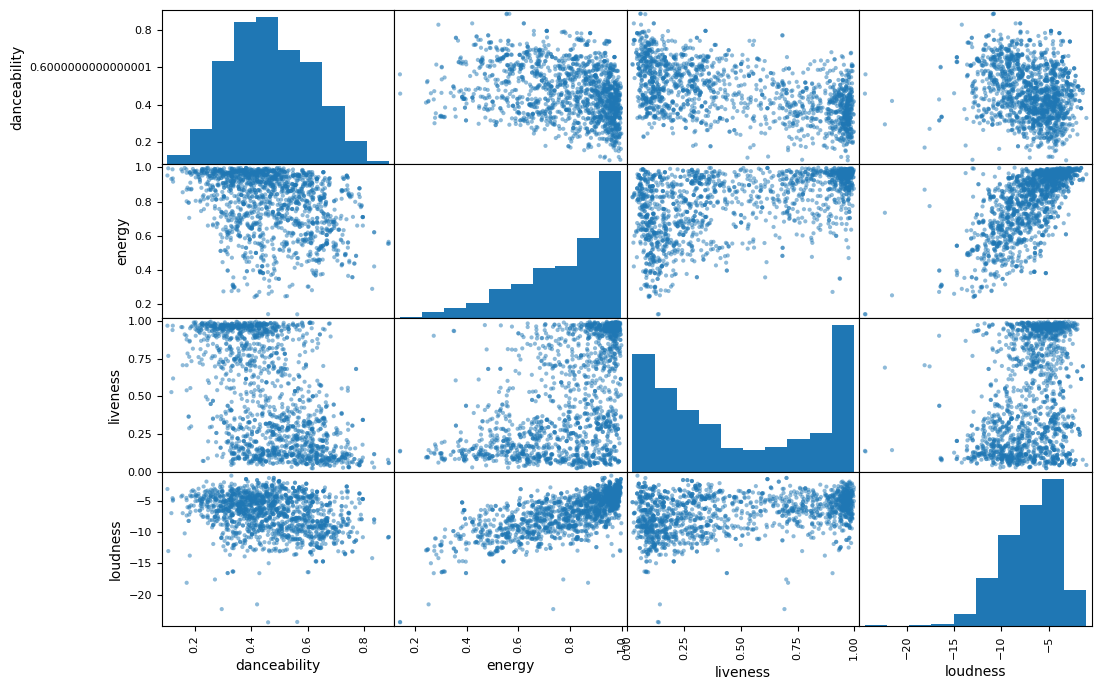

In [10]:
from pandas.plotting import scatter_matrix
#livenessو danceability
#energyو loudness
attributes = [ 'danceability', 'energy', 'liveness', 'loudness']
scatter_matrix(data[attributes], figsize=(12, 8));

In [11]:
data.popularity.value_counts()
#فيه 20 اغنيه شعبيتها = 81

20    81
17    71
16    69
19    69
18    65
      ..
71     1
54     1
59     1
61     1
64     1
Name: popularity, Length: 69, dtype: int64

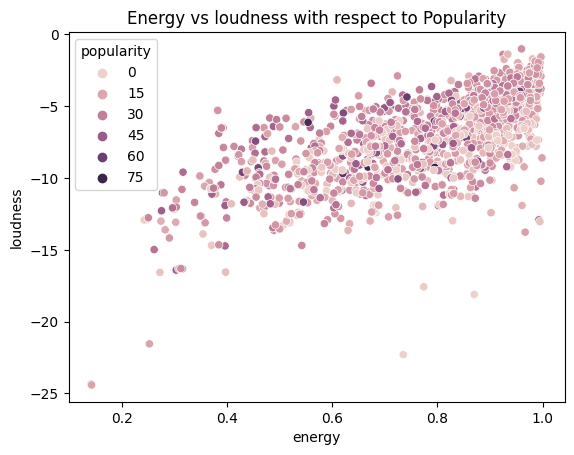

In [12]:
figsize=(12, 8)
sns.scatterplot(x=data['energy'],y=data['loudness'],hue=data['popularity'])
plt.title('Energy vs loudness with respect to Popularity')
plt.show()

In [13]:
data['album'].value_counts()

Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th Anniversary Edition)                   10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: album, Length: 90, dtype: int64

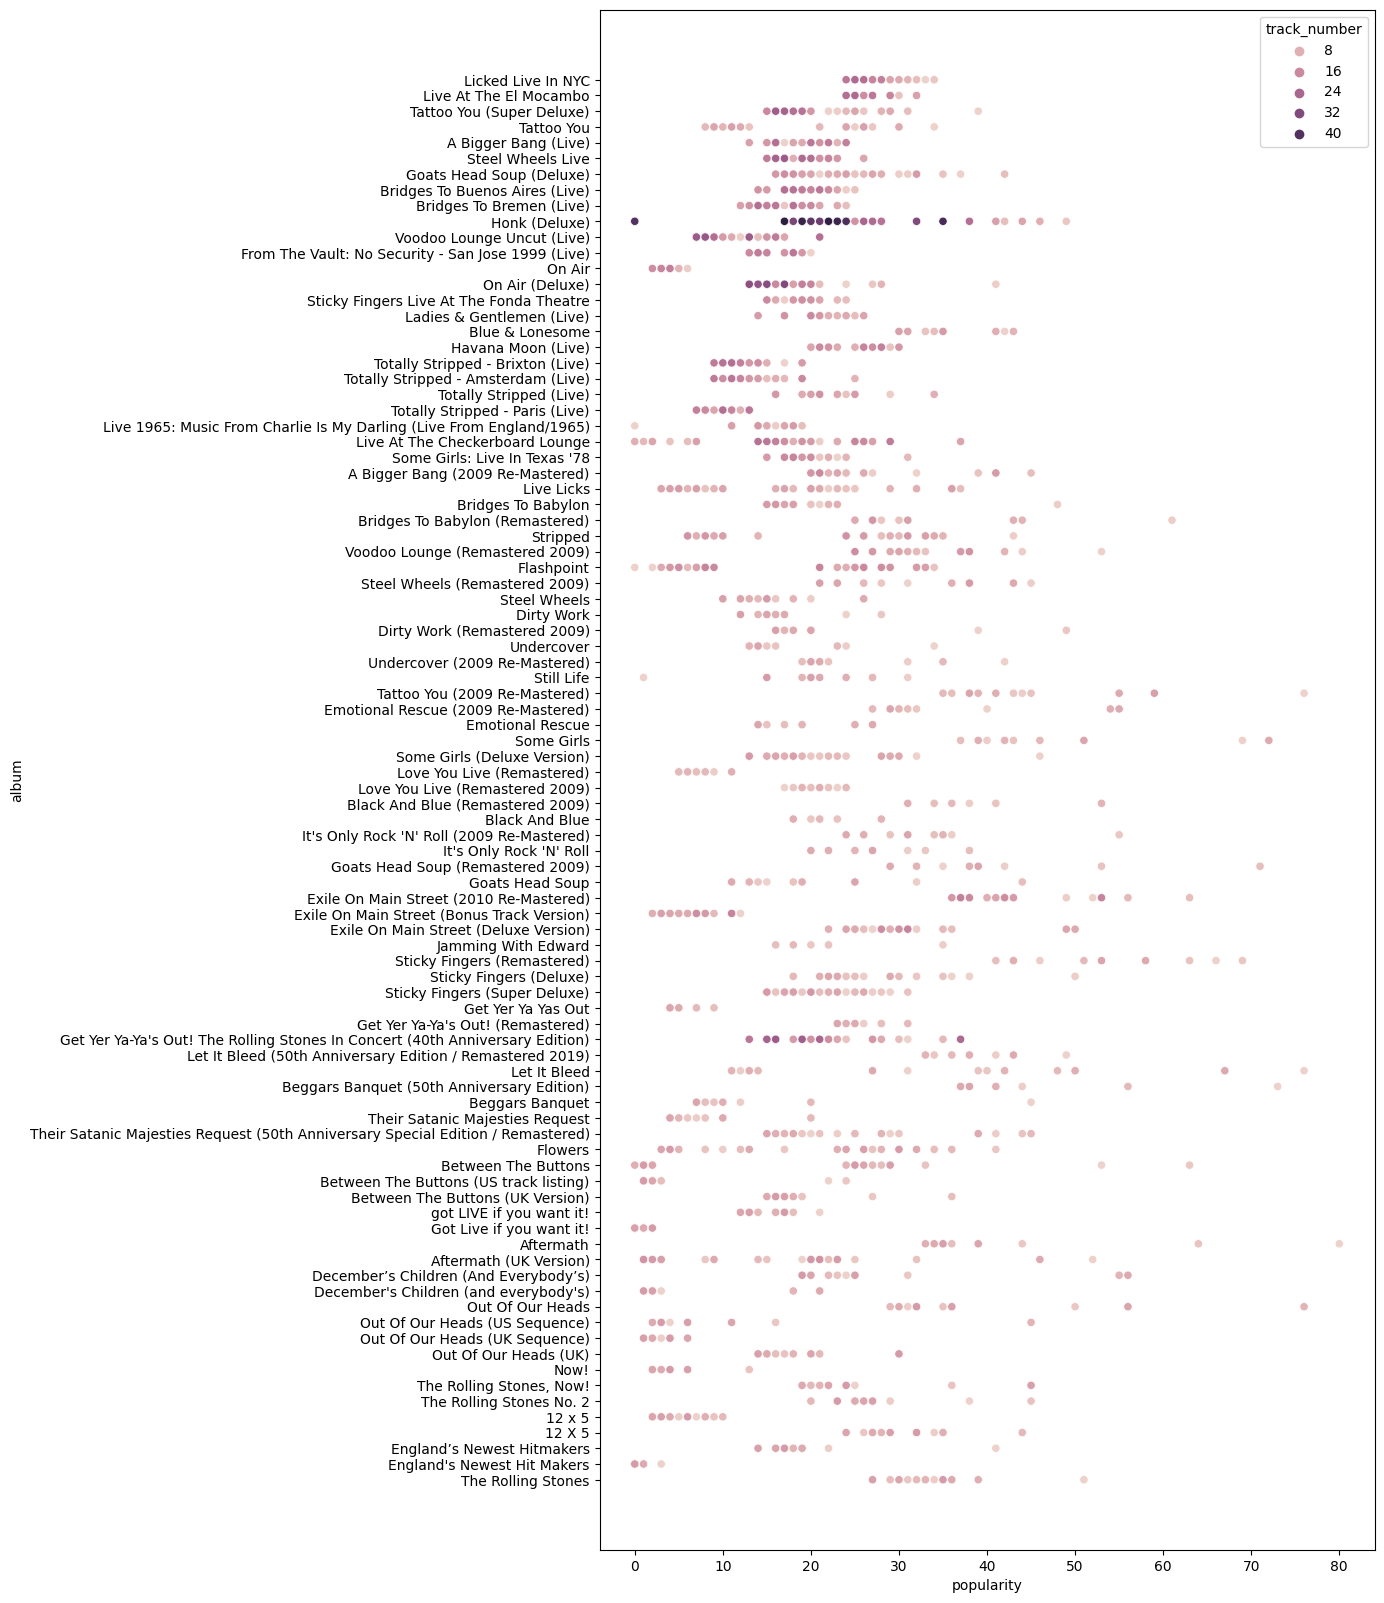

In [14]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=data['popularity'] ,y=data['album'], hue = data['track_number'])
plt.show()

In [15]:
data.dtypes

name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

In [16]:
data_x = data.drop(['album','name','id', 'uri','release_date'], axis = 1 )

#**Feature Engineering**

In [17]:
data_x

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


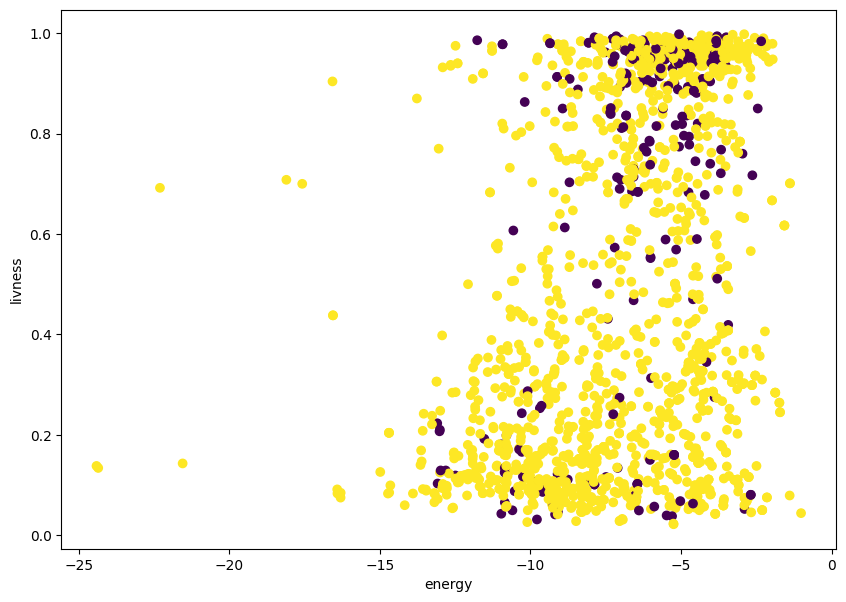

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2, random_state= 0)
km.fit(data_x)
plt.figure(figsize=(10,7))
plt.scatter(x= data_x.loc[:, 'loudness'], y= data_x.loc[:, 'liveness'], c= km.labels_)
plt.xlabel('energy')
plt.ylabel('livness');

#**StandardScaler**

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = ss.fit_transform(data_x)

In [48]:
X1 = pd.DataFrame(X1, columns=data_x.columns)
X1 =  X1.loc[:, :]
X1

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,-1.160941,-0.739355,-0.041343,1.115764,3.012099,1.261552,-1.985045,0.784410,-0.276517,-2.387590,0.982999,-1.930719
1,-1.008460,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,1.063495,-0.042138
2,-0.855979,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,1.063495,0.050079
3,-0.703497,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,0.902504,0.444539
4,-0.551016,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,0.902504,0.437392
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-0.093572,-0.411192,-0.020176,0.776555,-0.572125,-0.480613,-0.749192,-0.515591,1.753944,1.664646,1.465975,-0.957125
1606,0.058909,-0.848449,0.283215,-0.480188,-0.594461,0.069544,-0.820356,0.286496,-0.139166,-0.588999,1.224487,-0.115148
1607,0.211390,0.530186,2.265844,-0.102053,-0.594467,-1.217308,-0.330558,0.048195,-0.993931,1.093665,0.741512,-0.753985
1608,0.363871,-0.147254,1.630838,-1.369917,-0.594213,-0.933346,-0.867131,-0.141672,-0.802344,-0.216997,0.500024,-1.256295


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


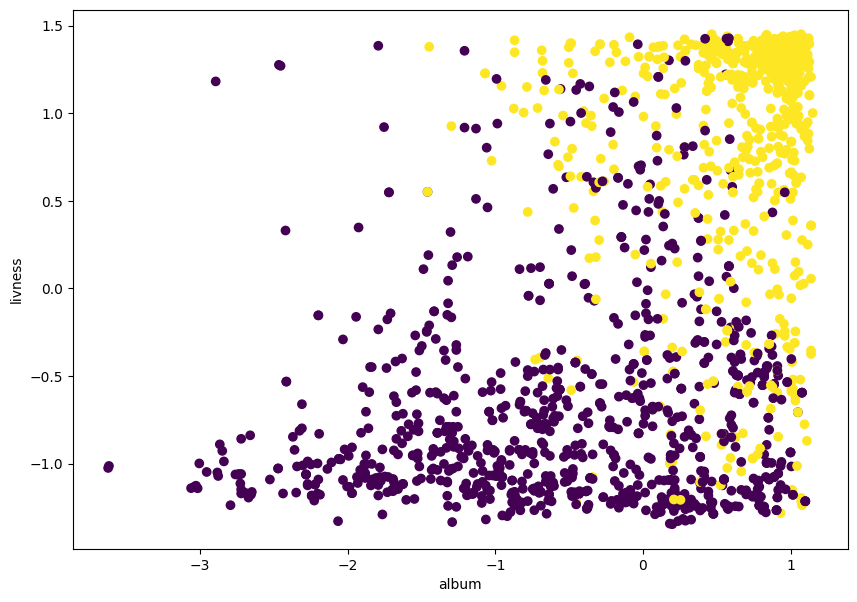

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2, random_state= 0)
km.fit(X1)
plt.figure(figsize=(10,7))
plt.scatter(x= X1.loc[:, 'energy'], y=X1.loc[:,'liveness'], c= km.labels_)
plt.xlabel('album')
plt.ylabel('livness');

#**MinMaxScaler**

In [50]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X2 =mm.fit_transform(data_x)

In [51]:
X2 = pd.DataFrame(X2, columns=data_x.columns)
X2 =  X2.loc[:, :]
X2

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0.000000,0.082889,0.458493,0.993007,1.000000,0.932384,0.491365,0.144474,0.420994,0.031006,0.4125,0.028766
1,0.021739,0.439633,0.283525,0.960373,0.233936,0.962094,0.838035,0.087716,0.500239,0.326489,0.4250,0.241629
2,0.043478,0.418506,0.360153,0.965035,0.401606,0.956972,0.832350,0.152796,0.492057,0.321355,0.4250,0.252023
3,0.065217,0.570419,0.338442,0.983683,0.000107,0.894478,0.806745,0.282623,0.509303,0.150924,0.4000,0.296483
4,0.086957,0.402409,0.254151,0.965035,0.056124,0.967216,0.825425,0.116178,0.494808,0.211499,0.4000,0.295677
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.152174,0.157940,0.462324,0.921911,0.006195,0.309497,0.649483,0.032790,0.770502,0.992813,0.4875,0.138500
1606,0.173913,0.057939,0.517241,0.658508,0.000002,0.506198,0.640378,0.101698,0.444637,0.457906,0.4500,0.233400
1607,0.195652,0.373234,0.876117,0.737762,0.000000,0.046102,0.703044,0.081225,0.297504,0.857290,0.3750,0.161396
1608,0.217391,0.218303,0.761175,0.472028,0.000070,0.147628,0.634393,0.064913,0.330483,0.546201,0.3375,0.104780


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


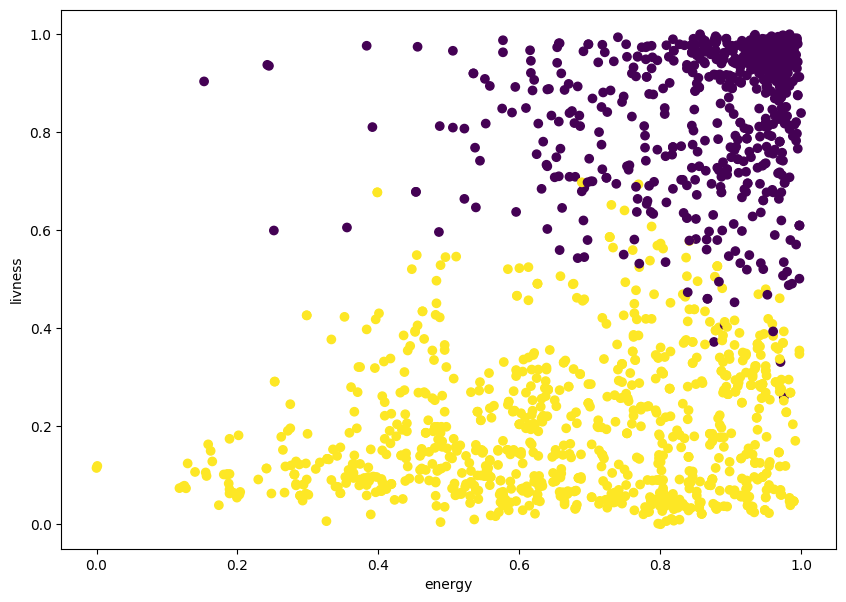

In [52]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2, random_state= 0)
km.fit(X2)
plt.figure(figsize=(10,7))
plt.scatter(x= X2.loc[:, 'energy'], y=X2.loc[:,'liveness'], c= km.labels_)
plt.xlabel('energy')
plt.ylabel('livness');

#**Cluster Analysis**

#**Finding the Optimal Number of Clusters**


In [53]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters= i, random_state=0)
    km.fit(X2)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [54]:
wcss

[805.9154175212404,
 574.637794306687,
 499.28605133121096,
 444.4657643606218,
 409.66262879912597,
 388.3770044170735,
 370.09185974937964,
 354.8743199774449,
 340.8238698106587]

In [55]:
km = KMeans(n_clusters = len(X2))
km.fit(X2)
km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-55-d0f3b3924d0f>:2: ConvergenceWarning: Number of distinct clusters (1604) found smaller than n_clusters (1610). Possibly due to duplicate points in X.
  km.fit(X2)


0.0

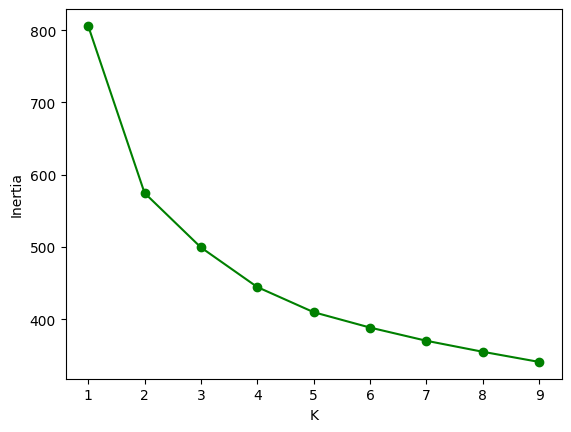

In [57]:
plt.plot(range(1,10), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


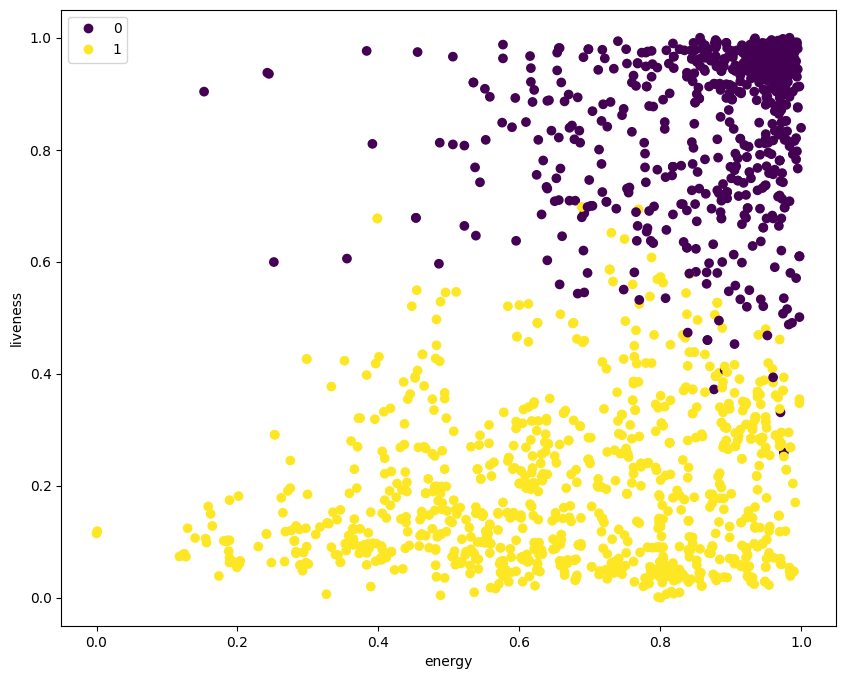

In [56]:
km = KMeans(n_clusters = 2, random_state=0)
km.fit(X2)

plt.figure(figsize=(10,8))
scatter = plt.scatter(x= X2.loc[:, 'energy'], y=X2.loc[:,'liveness'], c= km.labels_)
plt.xlabel('energy')
plt.ylabel('liveness');
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1]);

In [58]:
y_pred = km.predict(X2)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [59]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

##**silhouette**
solve the missing and unclear cluster

In [60]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters = 2)
km.fit(X2)
silhouette_score(X2, km.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2684345999214407

In [61]:
sil_scores = []
for i in range(2,10):
    km = KMeans(n_clusters= i, random_state=0)
    km.fit(X2)
    sil_scores.append(silhouette_score(X2, km.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

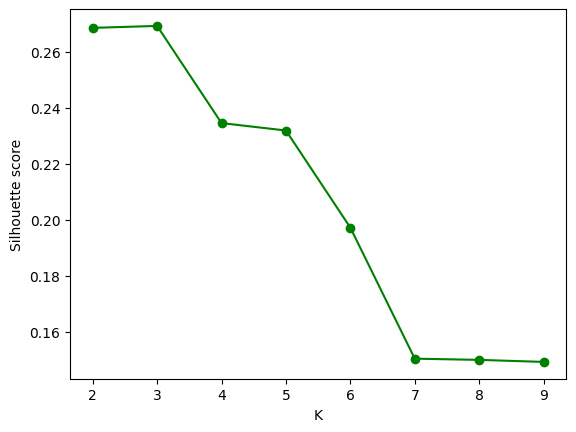

In [62]:
plt.plot(range(2,10), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [63]:
data['cluster'] = km.labels_

In [64]:
data[data['cluster'] == 0].album.value_counts(normalize=True)

Some Girls (Deluxe Version)                                                      0.097345
Honk (Deluxe)                                                                    0.075221
Tattoo You (Super Deluxe)                                                        0.048673
Sticky Fingers (Deluxe)                                                          0.035398
A Bigger Bang (2009 Re-Mastered)                                                 0.035398
Sticky Fingers (Super Deluxe)                                                    0.030973
Tattoo You                                                                       0.030973
Steel Wheels (Remastered 2009)                                                   0.030973
Tattoo You (2009 Re-Mastered)                                                    0.026549
Goats Head Soup (Deluxe)                                                         0.026549
It's Only Rock 'N' Roll (2009 Re-Mastered)                                       0.026549
Exile On M